In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.constructive.rlf_algo import *
from packing_coloring.algorithms.constructive.swo_algo import *
from packing_coloring.algorithms.perturbative.genetic_algo import *
from packing_coloring.algorithms.perturbative.tabupackcol import *

import numpy as np
import pandas as pd
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def square_grid_ma_pcoloring(size, file_name="test.pdf", out_size=(250,250), font_size=22):
    g = gt.lattice([size, size])
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)
    
    eval_func = lambda a: a.get_sum()
    p_col1 = hybrid_algorithm(prob, partial_pack_col, 10, swo_algorithm, eval_func, 10)

    pos = gt.sfdp_layout(g, max_iter=1)
    for i,v in enumerate(g.vertices()):
        pos[v][0] = np.floor(i/size)*2
        pos[v][1] = (i%size)*2

    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)
    
def random_ma_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = gt.load_graph("instances/dot_format/random.dot")
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    eval_func = lambda a: a.get_sum()
    p_col1 = hybrid_algorithm(prob, partial_pack_col, 10, swo_algorithm, eval_func, 10)
    
    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

# Packing coloration of 3x3 grid using TS

In [3]:
square_grid_ma_pcoloring(3, file_name="../Report/Pictures/MA_G3-3.pdf", out_size=(105, 150), font_size=12)

init candidate # 0 : 5
init candidate # 1 : 5
init candidate # 2 : 4
init candidate # 3 : 4
init candidate # 4 : 4
init candidate # 5 : 5
init candidate # 6 : 4
init candidate # 7 : 5
init candidate # 8 : 5
init candidate # 9 : 4
individu # 0 's quality: 4
individu # 1 's quality: 4
individu # 2 's quality: 4


KeyboardInterrupt: 

# Packing coloration of 24x24 grid using MA

In [ ]:
square_grid_ma_pcoloring(24, file_name="../Report/Pictures/MA_G24-24.pdf", out_size=(500, 500), font_size=15)

init candidate # 0 : 13
init candidate # 1 : 15
init candidate # 2 : 15
init candidate # 3 : 16
init candidate # 4 : 16
init candidate # 5 : 17
init candidate # 6 : 15
init candidate # 7 : 14
init candidate # 8 : 19
init candidate # 9 : 17
individu # 0 's quality: 12
individu # 1 's quality: 13
individu # 2 's quality: 11
individu # 3 's quality: 12
individu # 4 's quality: 12
individu # 5 's quality: 11
individu # 6 's quality: 13
individu # 7 's quality: 12
individu # 8 's quality: 14
individu # 9 's quality: 15
[[ 11 104]
 [ 11 104]
 [ 12 112]
 [ 12 112]
 [ 12 112]
 [ 12 113]
 [ 13 120]
 [ 13 121]
 [ 14 130]
 [ 15 148]]
generation # 10
parent1: 6 -> 13
parent2: 4 -> 12
child: 13
improved child:  12
mutated child:  16
improved mutated child:  12
[[ 11 104]
 [ 11 104]
 [ 12 112]
 [ 12 112]
 [ 12 112]
 [ 12 112]
 [ 12 112]
 [ 12 113]
 [ 13 120]
 [ 13 121]
 [ 14 130]
 [ 15 148]]

generation # 9
parent1: 5 -> 12
parent2: 4 -> 12
child: 13
improved child:  12
mutated child:  14
improved m

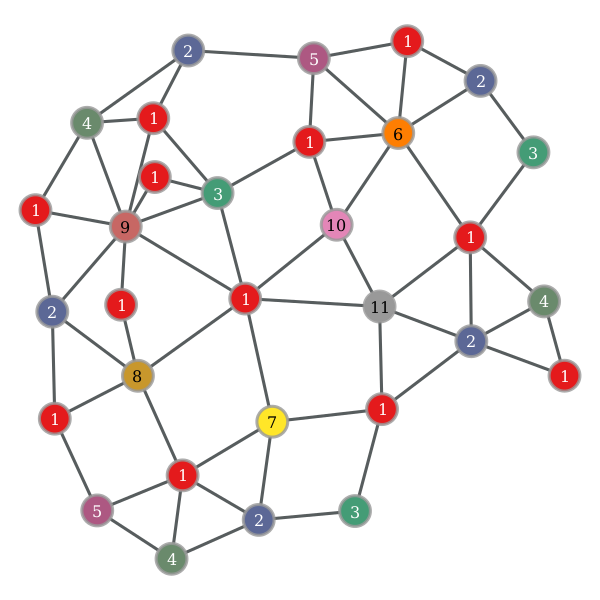

11
[ 4  9  1  8  1  3  1  7  2  5  1  1 10 11  1  3  1  6  1  2  2  3  2  4  1
  1  5  4  2  1  1]


In [3]:
random_ma_pcoloring(file_name="../Report/Pictures/MA_Random.pdf", out_size=(250,250), font_size=16)